# Question No.: 04
Classification with KNN model. 

In [1145]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from sklearn.neighbors import KNeighborsClassifier
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
print('Done!')

from sklearn.metrics import mean_squared_error
import seaborn as sns

print('Done!')

Done!
Done!


# Imbalanced data set there needs fixing
The data set is balanced using by down sampling the majority class of the dataset. 

In [1146]:
# Loading the dataset
water_data = pd.read_csv('Water_Potability.csv')
print("Data Loaded successfully!")

Data Loaded successfully!


In [1147]:
water_data.head(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0


In [1148]:
# taking care of NaNs
water_data = water_data.dropna()
water_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [1149]:
from scipy import stats
# using zscore to get ride of outliers
water_data = water_data[(np.abs(stats.zscore(water_data))<4).all(axis = 1)]
water_data.shape

(2007, 10)

In [1150]:
from sklearn.utils import resample

# Separating minority and majority classes
not_potable = water_data[water_data.Potability == 0]
potable = water_data[water_data.Potability == 1]

# downsampling minority
not_potable_downsampled = resample(not_potable,replace = False, n_samples = len(potable))

# combining majority and upsampled minority
new_data = pd.concat([not_potable_downsampled,potable])

#check new class counts
new_data.Potability.value_counts()

0    809
1    809
Name: Potability, dtype: int64

In [1151]:
# Saving non-normalized balanced data
Input_values_water = new_data[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']].values
Target_values_water = new_data['Potability'].values
 
np.save('water_data_input',Input_values_water)
np.save('water_data_target', Target_values_water)

# Input and Target data columns for Water potability
Column_name = {0: 'ph', 1: 'Hardness', 2:'Solids',3:'Chloramines',4:'Sulfate',5:'Conductivity',6:'Organic_carbon',7:'Trihalomethanes',8:'Turbidity'}

In [1152]:
# loading the saved dataset 
X = np.load('water_data_input.npy') # Load the input
Y = np.load('water_data_target.npy') # Load the target

Column_name = {0: 'ph', 1: 'Hardness', 2:'Solids',3:'Chloramines',4:'Sulfate',5:'Conductivity',6:'Organic_carbon',7:'Trihalomethanes',8:'Turbidity'}

print('Done!')

Done!


In [1153]:
print(np.shape(X),np.shape(Y)) # Check dimesions of data

(1618, 9) (1618,)


In [1154]:
#Y = np.reshape(Y,(-1,1))
#print(np.shape(X),np.shape(Y))

Text(0.5, 0, 'Solids')

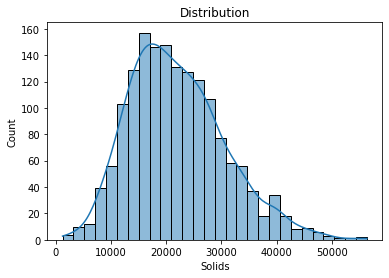

In [1155]:
# Choose a column to see the distribution

n_column = 2

fig = sns.histplot(X[:,n_column],kde = 'True')
fig.set_title('Distribution')
fig.set_xlabel(Column_name[n_column])



Text(0.5, 0, 'Target')

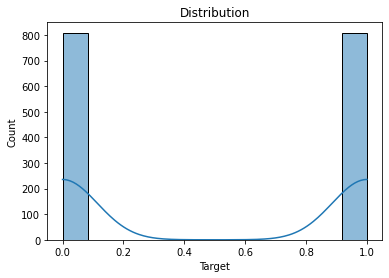

In [1156]:
# target distribution
fig = sns.histplot(Y,kde = 'True')
fig.set_title('Distribution')
fig.set_xlabel('Target')

In [1157]:
# Splitting training and validation data set, shuffle is on! 
X_tr, X_va, Y_tr,Y_va = train_test_split(X,Y,test_size = 0.25, shuffle = True)
print('training set == ', np.shape(X_tr),np.shape(Y_tr),', validation set ==',np.shape(X_va),np.shape(Y_va))

training set ==  (1213, 9) (1213,) , validation set == (405, 9) (405,)


In [1158]:
# Standard Normalization

scaler_S = StandardScaler().fit(X_tr)
X_tr_Norm = scaler_S.transform(X_tr)

X_va_Norm = scaler_S.transform(X_va)
print('Done!')

Done!


Text(0.5, 0, 'Chloramines')

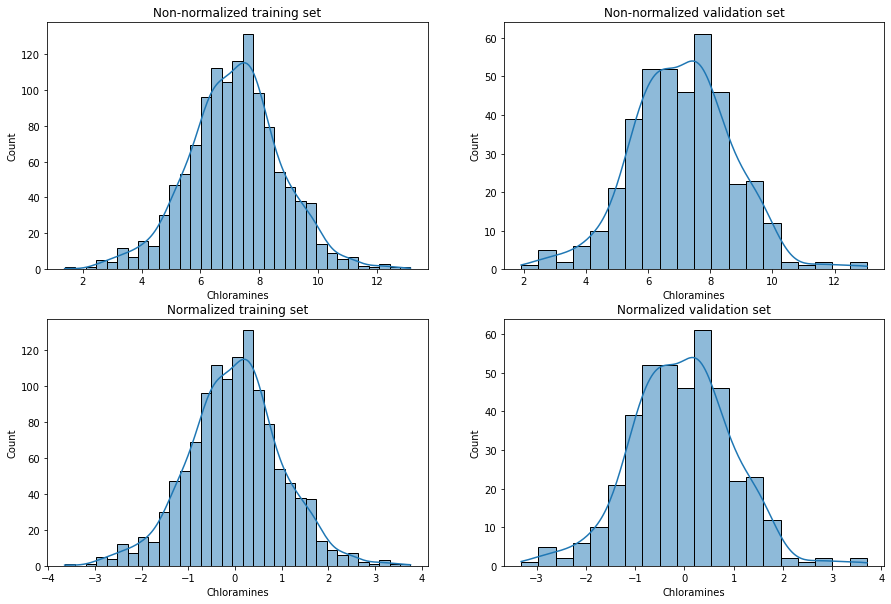

In [1159]:
# Comparing th distribution from the normalized training and validation sets

n_column = 3

fig2 = plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
fig = sns.histplot(X_tr[:,n_column],kde = 'True')
fig.set_title('Non-normalized training set')
fig.set_xlabel(Column_name[n_column])

plt.subplot(2,2,2)
fig = sns.histplot(X_va[:,n_column],kde = 'True')
fig.set_title('Non-normalized validation set')
fig.set_xlabel(Column_name[n_column])

plt.subplot(2,2,3)
fig = sns.histplot(X_tr_Norm[:,n_column],kde = 'True')
fig.set_title('Normalized training set')
fig.set_xlabel(Column_name[n_column])

plt.subplot(2,2,4)
fig = sns.histplot(X_va_Norm[:,n_column],kde = 'True')
fig.set_title('Normalized validation set')
fig.set_xlabel(Column_name[n_column])

In [1160]:
print(np.shape(Y_va))

(405,)


In [1161]:
# using KNeighborsClassifier to predict the condition of potability of water
n_val = 53
p_val = 3

knn = KNeighborsClassifier(n_neighbors = n_val, p = p_val)

knn.fit(X_tr_Norm,Y_tr) # fitting the model with training set

# predicting the response for tr and va sets.
Y_tr_prob = knn.predict_proba(X_tr_Norm)[:,1]
Y_tr_pred = knn.predict(X_tr_Norm)

Y_va_prob = knn.predict_proba(X_va_Norm)[:,1]
Y_va_pred = knn.predict(X_va_Norm)

idx_tr_1 = (Y_tr==1)
idx_tr_0 = (Y_tr==0)

idx_va_1 = (Y_va==1)
idx_va_0 = (Y_va==0)


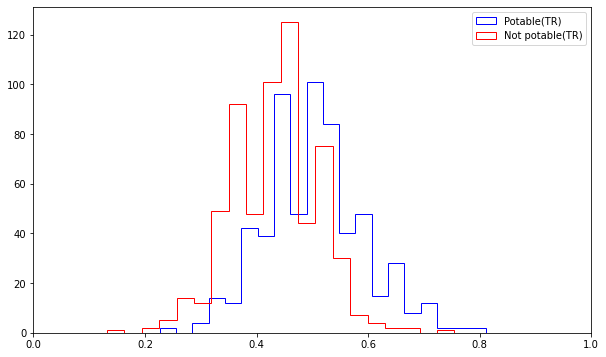

In [1162]:
# plotting the characteristics of potable and non-potable training data using histogram 
bin_width = 20
plt.figure(figsize=(10, 6))

plt.figure(1)
plt.hist(Y_tr_prob[idx_tr_1],bin_width,histtype='step',color = "blue", label='Potable(TR)')

#plt.xlim([0,1])
plt.legend()


plt.figure(1)
plt.hist(Y_tr_prob[idx_tr_0],bin_width,histtype='step',color = "red",label='Not potable(TR)')

plt.xlim([0,1])

plt.legend()

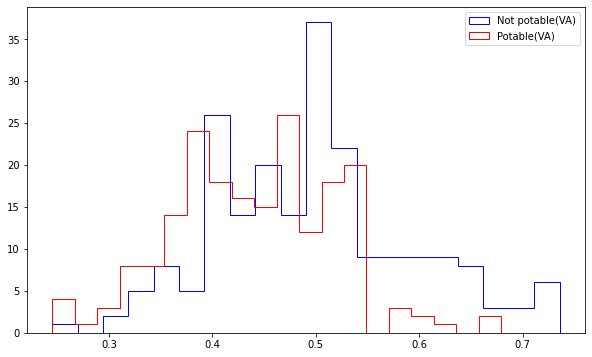

In [1163]:
# plotting the characteristics of potable and non-potable validation data using histogram 
plt.figure(figsize=(10, 6))

plt.figure(1)
plt.hist(Y_va_prob[idx_va_1],bin_width,histtype='step',color = "blue", label='Not potable(VA)')

#plt.xlim([0,1])
plt.legend()


plt.figure(1)
plt.hist(Y_va_prob[idx_va_0],bin_width,histtype='step',color = "red",label='Potable(VA)')

#plt.xlim([0,1])

plt.legend()

Text(0.5, 1.0, 'AUC Training')

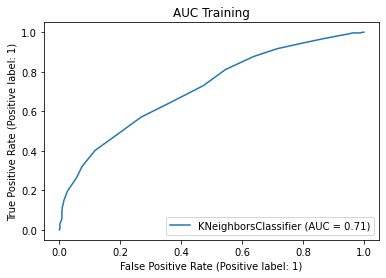

In [1164]:
# plotting AUC for training set
metrics.plot_roc_curve(knn, X_tr_Norm, Y_tr)
plt.title('AUC Training')

Text(0.5, 1.0, 'AUC Validation')

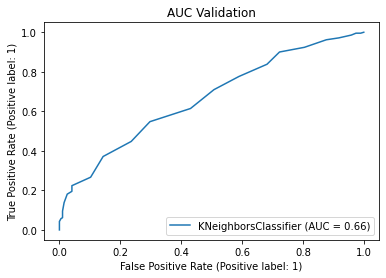

In [1165]:
# plotting AUC for validation set
metrics.plot_roc_curve(knn, X_va_Norm, Y_va) 
plt.title('AUC Validation')

Text(0.5, 1.0, 'TR')

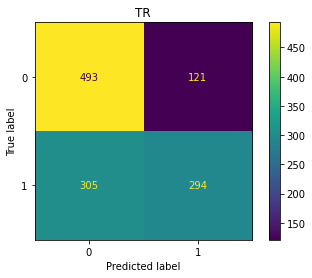

In [1166]:
# plotting confusion matrix for training set
plot_confusion_matrix(knn, X_tr_Norm, Y_tr) 
plt.title('TR')

Text(0.5, 1.0, 'VA')

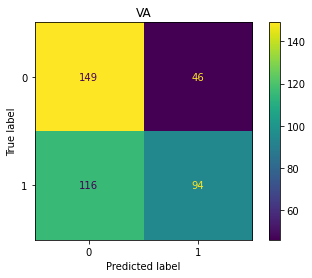

In [1167]:
# plotting confusion matrix for validation set
plot_confusion_matrix(knn, X_va_Norm, Y_va) 
plt.title('VA')

Text(0.5, 1.0, 'TR, Normalized')

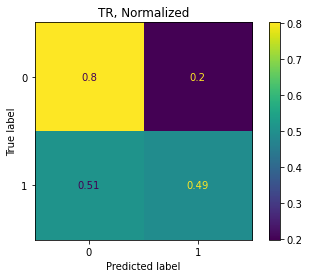

In [1168]:
plot_confusion_matrix(knn, X_tr_Norm, Y_tr,normalize='true') 
plt.title('TR, Normalized')

Text(0.5, 1.0, 'VA, Normalized')

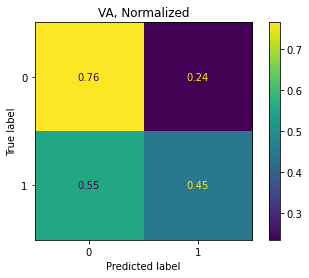

In [1169]:
plot_confusion_matrix(knn, X_va_Norm, Y_va,normalize='true') 
plt.title('VA, Normalized')

In [1170]:
print ("Recall (TR) = ", metrics.recall_score(Y_tr, Y_tr_pred))
print ("Recall (VA) = ", metrics.recall_score(Y_va, Y_va_pred))

Recall (TR) =  0.49081803005008345
Recall (VA) =  0.44761904761904764


In [1171]:
print ("Accuracy (TR) = ", metrics.accuracy_score(Y_tr, Y_tr_pred))
print ("Accuracy (VA) = ", metrics.accuracy_score(Y_va, Y_va_pred))

Accuracy (TR) =  0.6488046166529267
Accuracy (VA) =  0.6


In [1172]:
print ("Precision (TR) = ", metrics.precision_score(Y_tr, Y_tr_pred))
print ("Precision (VA) = ", metrics.precision_score(Y_va, Y_va_pred))

Precision (TR) =  0.708433734939759
Precision (VA) =  0.6714285714285714


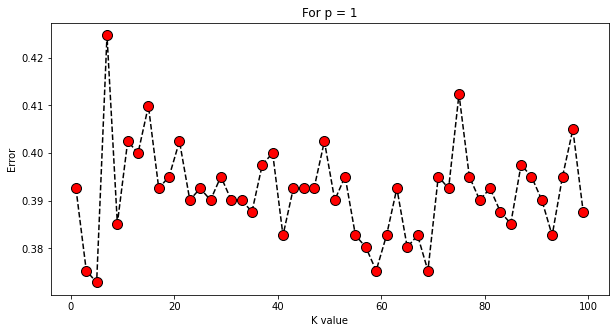

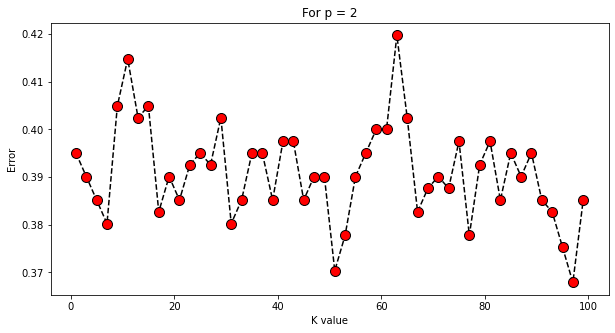

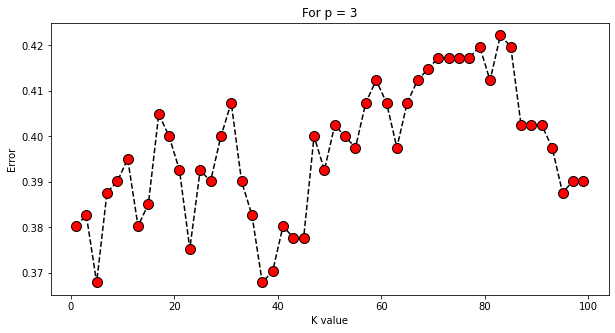

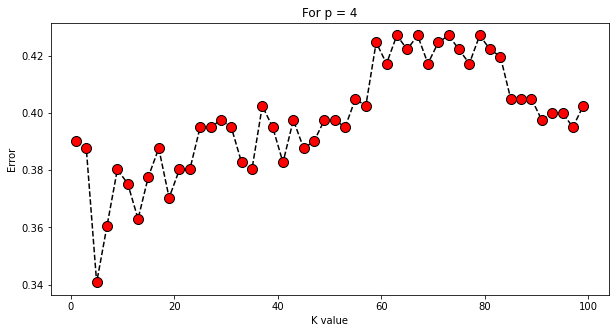

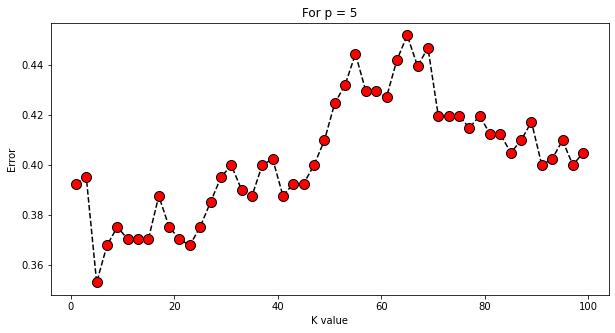

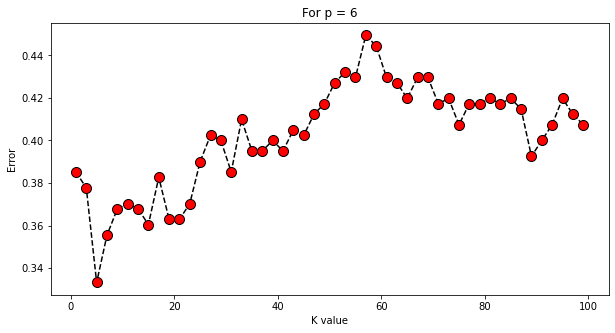

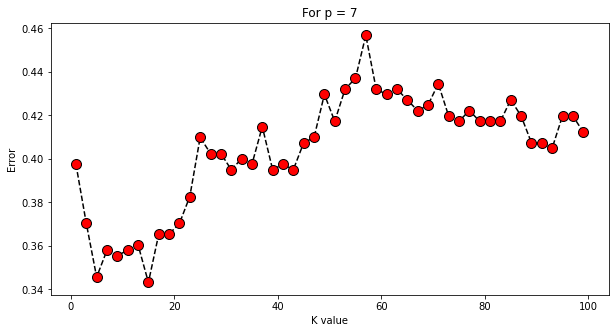

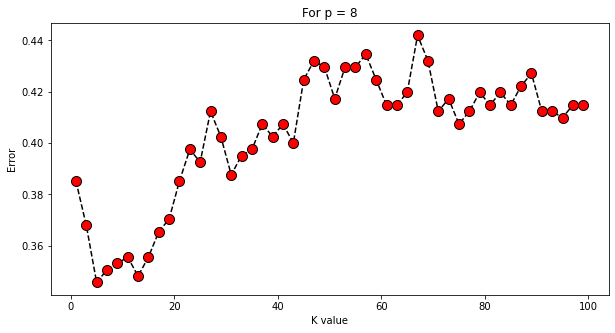

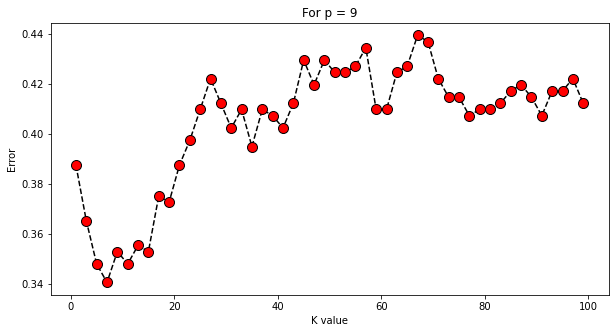

In [1173]:
# Finding best value of K and best value of p 
p_val = np.arange(1,10)
Best_K = -1;
Best_p = -1;
min_error = 1000000000;

#plt.figure(figsize=(30,10))

for j in p_val:
    error = []
    K_val = np.arange(1,100,2)
    for i in K_val:
        knn = KNeighborsClassifier(n_neighbors=i, p = j)
        knn.fit(X_tr_Norm, Y_tr) # normalized
        Y_va_pred_Norm = knn.predict(X_va_Norm)
        val = mean_squared_error(Y_va,Y_va_pred_Norm)
        error.append(val)
        if (val < min_error):
            min_error = val
            Best_p = j
            Best_K = i
    plt.figure(figsize=(10,5))
    plt.plot(K_val,error,'--k',marker = 'o',markerfacecolor='red',markersize=10)
    plt.xlabel('K value')
    
    plt.ylabel('Error')
    titl = 'For p = '+ str(j)
    
    plt.title(titl)

In [1174]:
print('Best K value is ',Best_K,' and best p value is ',Best_p) 

Best K value is  5  and best p value is  6


In [1175]:
# using best value of K and p obtained to classify the non-normalized data set
n_val = Best_K
p_val = Best_p

knn = KNeighborsClassifier(n_neighbors = n_val, p = p_val)

knn.fit(X_tr,Y_tr) # fitting the model with training set

# predicting the response for tr and va sets.
Y_tr_prob = knn.predict_proba(X_tr)[:,1]
Y_tr_pred = knn.predict(X_tr)

Y_va_prob = knn.predict_proba(X_va)[:,1]
Y_va_pred = knn.predict(X_va)

idx_tr_1 = (Y_tr==1)
idx_tr_0 = (Y_tr==0)

idx_va_1 = (Y_va==1)
idx_va_0 = (Y_va==0)

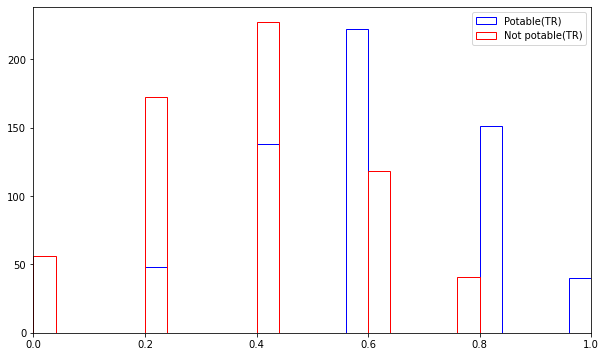

In [1176]:
bin_width = 10
plt.figure(figsize=(10, 6))

plt.figure(1)
plt.hist(Y_tr_prob[idx_tr_1],bin_width,histtype='step',color = "blue", label='Potable(TR)')

#plt.xlim([0,1])
plt.legend()


plt.figure(1)
plt.hist(Y_tr_prob[idx_tr_0],bin_width,histtype='step',color = "red",label='Not potable(TR)')

plt.xlim([0,1])

plt.legend()

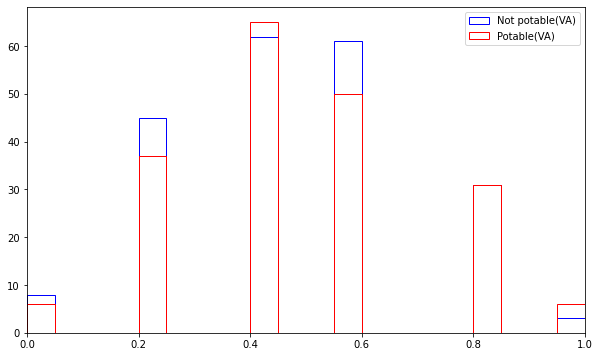

In [1177]:
plt.figure(figsize=(10, 6))

plt.figure(1)
plt.hist(Y_va_prob[idx_va_1],bin_width,histtype='step',color = "blue", label='Not potable(VA)')

plt.xlim([0,1])
plt.legend()


plt.figure(1)
plt.hist(Y_va_prob[idx_va_0],bin_width,histtype='step',color = "red",label='Potable(VA)')

#plt.xlim([0,1])

plt.legend()

Text(0.5, 1.0, 'AUC Training')

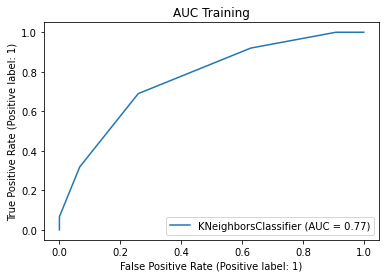

In [1178]:

metrics.plot_roc_curve(knn, X_tr, Y_tr)
plt.title('AUC Training')

Text(0.5, 1.0, 'AUC Validation')

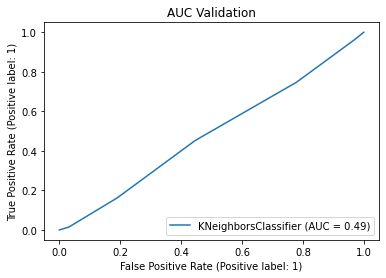

In [1179]:
metrics.plot_roc_curve(knn, X_va, Y_va) 
plt.title('AUC Validation')

Text(0.5, 1.0, 'TR')

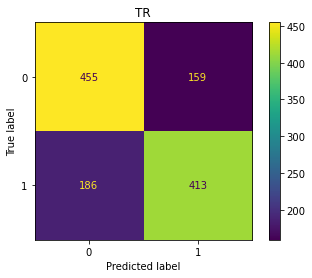

In [1180]:
plot_confusion_matrix(knn, X_tr, Y_tr) 
plt.title('TR')

Text(0.5, 1.0, 'VA')

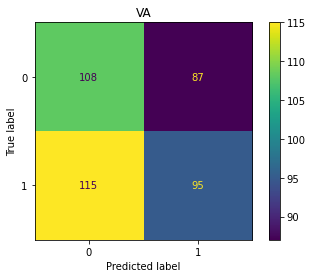

In [1181]:
plot_confusion_matrix(knn, X_va, Y_va) 
plt.title('VA')

Text(0.5, 1.0, 'TR, Normalized')

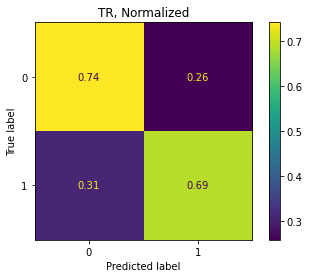

In [1182]:
plot_confusion_matrix(knn, X_tr, Y_tr,normalize='true') 
plt.title('TR, Normalized')

Text(0.5, 1.0, 'VA, Normalized')

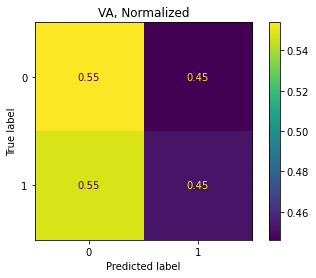

In [1183]:
plot_confusion_matrix(knn, X_va, Y_va,normalize='true') 
plt.title('VA, Normalized')

In [1184]:
print ("Recall (TR) = ", metrics.recall_score(Y_tr, Y_tr_pred))
print ("Recall (VA) = ", metrics.recall_score(Y_va, Y_va_pred))

Recall (TR) =  0.6894824707846411
Recall (VA) =  0.4523809523809524


In [1185]:
print ("Accuracy (TR) = ", metrics.accuracy_score(Y_tr, Y_tr_pred))
print ("Accuracy (VA) = ", metrics.accuracy_score(Y_va, Y_va_pred))

Accuracy (TR) =  0.7155812036273702
Accuracy (VA) =  0.5012345679012346


In [1186]:
print ("Precision (TR) = ", metrics.precision_score(Y_tr, Y_tr_pred))
print ("Precision (VA) = ", metrics.precision_score(Y_va, Y_va_pred))

Precision (TR) =  0.722027972027972
Precision (VA) =  0.521978021978022


# Discussion
I am not really sure if something is wrong with the data or the model is not working correctly. The result of the classification of my dataset using KNN looks completely bizzare and inaccurate! 